In [10]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cwd = Path.cwd()
data_path = cwd.parent/'results'
data = pd.read_csv(data_path/f'brian_data.csv')

In [11]:
data

,subjectid,degrees,validity,falsealarms,mdiff,mratio,metadprimeusings,criterion,avgcorrectconf,avgconf,criteriona,dprimea,s,dprime,avgincorrectconf,hitrate
0,1,10.0,Invalid,0.041667,-0.183723,0.903190,1.714046,0.459723,3.523810,3.416667,-0.020958,1.891444,0.449696,2.543882,2.666667,0.791667
1,1,10.0,Valid,0.037037,-0.012703,0.993468,1.932129,0.478845,3.694737,3.587963,-0.103029,2.083517,0.374067,2.614620,2.807692,0.796296
2,1,20.0,Invalid,0.250000,0.357877,1.179654,2.349914,-0.354252,3.200000,3.000000,-0.511905,2.124094,0.766054,2.057484,2.000000,0.916667
3,1,20.0,Valid,0.101852,-1.751779,0.299322,0.748341,-0.026944,3.179487,3.129630,-0.248171,2.084213,0.625765,2.596028,2.666667,0.907407
4,1,30.0,Invalid,0.125000,-1.242870,0.239090,0.390530,0.300914,2.710526,2.625000,0.280706,1.242983,1.119165,1.698872,2.300000,0.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,33,20.0,Valid,0.240741,-0.504936,0.727892,1.350708,-0.212111,2.681818,2.587963,-0.400420,1.750116,0.615156,1.832065,2.175000,0.870370
188,33,30.0,Invalid,0.166667,-0.091403,0.878037,0.658028,0.483711,2.218750,2.104167,0.339895,0.774553,0.710005,0.967422,1.875000,0.500000
189,33,30.0,Valid,0.120370,-0.218888,0.776105,0.758748,0.516714,2.154839,2.060185,0.309055,0.924511,0.568038,1.312848,1.819672,0.555556
190,33,40.0,Invalid,0.208333,0.056883,0.854090,-0.332967,0.981284,1.409091,1.458333,0.932699,-0.339156,0.915119,-0.338132,1.500000,0.125000


In [97]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def sdt_distribution(criterion, s, d_prime, num_points=1000):
    # x value = stimulus strength
    x = np.linspace(-5, 5, num_points)

    # Signal and noise distribution means, set noise mean at 0
    signal_mean = d_prime * s
    noise_mean = 0

    # Calculate standard deviations for signal and noise distributions
    signal_std = s
    noise_std = 1

    # Calculate probabilities for signal and noise distributions
    signal_prob = (1 / (np.sqrt(2 * np.pi) * signal_std)) * np.exp(-(x - signal_mean)**2 / (2 * signal_std**2))
    noise_prob = (1 / (np.sqrt(2 * np.pi) * noise_std)) * np.exp(-(x - noise_mean)**2 / (2 * noise_std**2))

    return x, signal_prob, noise_prob

def plot_sdt_distribution(criterion, s, d_prime):
    x, signal_prob, noise_prob = sdt_distribution(criterion, s, d_prime)

    plt.plot(x, signal_prob, label='Signal + Noise')
    plt.plot(x, noise_prob, label='Noise')

    plt.xlabel('Stimulus Strength')
    plt.ylabel('Probability Density')
    plt.axvline(x=criterion, color='r', linestyle='--', alpha=0.5,label='Criterion')  # Add vertical line for the criterion
    plt.legend()
    plt.xticks([])  # Hide x-axis ticks and labels
    plt.yticks([])  # Hide y-axis ticks and labels
    plt.grid(True)
    plt.show()

VALIDITY

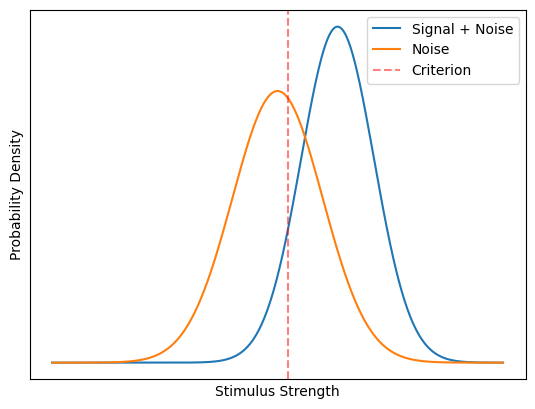

0.22747963156249998
1.6457820953124997
0.8084376849166667


In [98]:
#VALID

criterion = data.loc[data['validity'] == 'Valid', 'criteriona'].mean()
dprime = data.loc[data['validity'] == 'Valid', 'dprimea'].mean()
s = data.loc[data['validity'] == 'Valid', 's'].mean()

plot_sdt_distribution(criterion, s, dprime)

print(criterion)
print(dprime)
print(s)

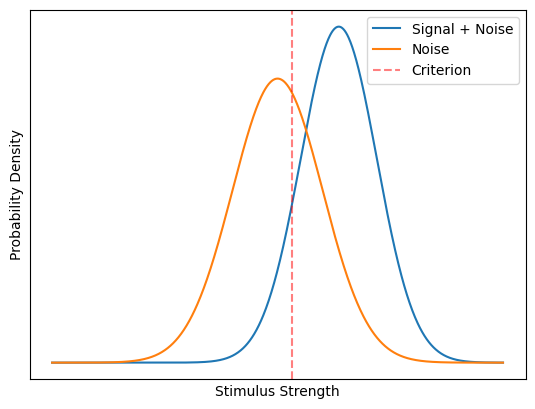

0.3134539589479167
1.605672811114583
0.8453668424062499


In [99]:
#Invalid

criterion = data.loc[data['validity'] == 'Invalid', 'criterion'].mean()
dprime = data.loc[data['validity'] == 'Invalid', 'dprime'].mean()
s = data.loc[data['validity'] == 'Invalid', 's'].mean()

plot_sdt_distribution(criterion, s, dprime)

print(criterion)
print(dprime)
print(s)

ECCENTRICITY

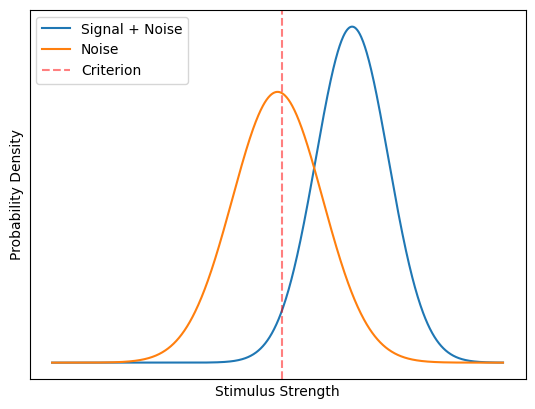

0.09971082068749999
2.051776512895833
0.8058956472708333


In [100]:
#10 DEGREES

criterion = data.loc[data['degrees'] == 10, 'criteriona'].mean()
dprime = data.loc[data['degrees'] == 10, 'dprimea'].mean()
s = data.loc[data['degrees'] == 10, 's'].mean()
plot_sdt_distribution(criterion, s, dprime)

print(criterion)
print(dprime)
print(s)

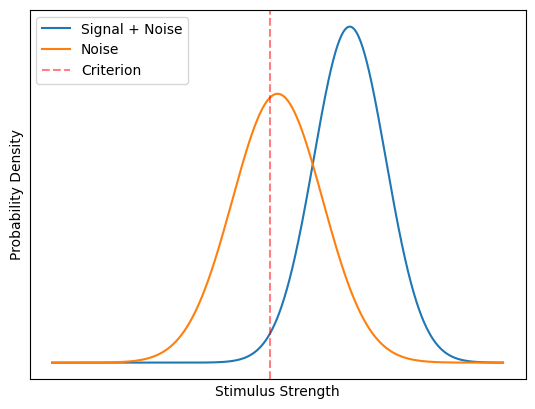

-0.16338320279166668
2.0017474960208332
0.8001213491041668


In [101]:
#20 DEGREES

criterion = data.loc[data['degrees'] == 20, 'criteriona'].mean()
dprime = data.loc[data['degrees'] == 20, 'dprimea'].mean()
s = data.loc[data['degrees'] == 20, 's'].mean()
plot_sdt_distribution(criterion, s, dprime)

print(criterion)
print(dprime)
print(s)

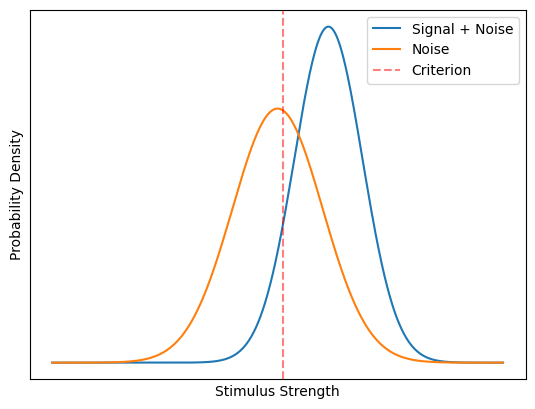

0.12459609843750001
1.4910699659375002
0.7561251114166666


In [102]:
#30 DEGREES

criterion = data.loc[data['degrees'] == 30, 'criteriona'].mean()
dprime = data.loc[data['degrees'] == 30, 'dprimea'].mean()
s = data.loc[data['degrees'] == 30, 's'].mean()

plot_sdt_distribution(criterion, s, dprime)

print(criterion)
print(dprime)
print(s)

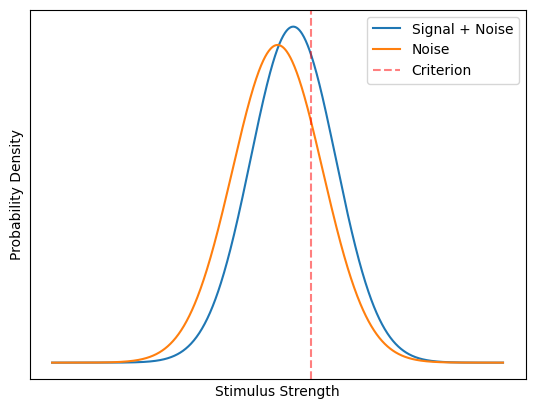

0.7491301664791666
0.36795003702083334
0.9454669468541667


In [103]:
#40 DEGREES

criterion = data.loc[data['degrees'] == 40, 'criteriona'].mean()
dprime = data.loc[data['degrees'] == 40, 'dprimea'].mean()
s = data.loc[data['degrees'] == 40, 's'].mean()

plot_sdt_distribution(criterion, s, dprime)

print(criterion)
print(dprime)
print(s)